In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp

In [2]:
deg = pd.read_csv("./Diff_genes_S36_VS_N36.sig.annotated.csv")

In [3]:
deg.head()

,ENSEMBL,ENTREZID,SYMBOL,GENENAME,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,up_down
0,ENSG00000111863,84830,ADTRP,androgen dependent TFPI regulating protein,107.210115,3.343302,0.423586,7.892858,2.953430e-15,2.093391e-11,up
1,ENSG00000224717,284577,LOC284577,uncharacterized LOC284577,53.740090,3.025162,0.434097,6.968865,3.195079e-12,1.132336e-08,up
2,ENSG00000185267,441549,CDNF,cerebral dopamine neurotrophic factor,57.501496,2.877024,0.429563,6.697565,2.119208e-11,6.008379e-08,up
3,ENSG00000246339,101929402,EXTL3-AS1,EXTL3 antisense RNA 1,171.171950,2.697945,0.412603,6.538837,6.199897e-11,1.464829e-07,up
4,ENSG00000036448,9172,MYOM2,myomesin 2,49.153990,2.567367,0.419573,6.118996,9.416658e-10,1.483228e-06,up


In [12]:
deg_all = deg[['SYMBOL', 'padj']]
deg_up = deg.ix[ deg.log2FoldChange > 0,['SYMBOL', 'padj']]
deg_down = deg.ix[ deg.log2FoldChange < 0,['SYMBOL', 'padj']]

In [14]:
deg_up.head()

,SYMBOL,padj
0,ADTRP,2.093391e-11
1,LOC284577,1.132336e-08
2,CDNF,6.008379e-08
3,EXTL3-AS1,1.464829e-07
4,MYOM2,1.483228e-06


In [22]:
li_all = deg_all.SYMBOL.squeeze().tolist()
li_up = deg_up.SYMBOL.squeeze().tolist()
li_down = deg_down.SYMBOL.squeeze().tolist()
degs_list = [li_all,li_up,li_down]
degs_type =['all','up','down']

In [8]:
names = gp.get_library_name()

In [4]:
library = ['ENCODE_TF_ChIP-seq_2015','ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',
           'Epigenomics_Roadmap_HM_ChIP-seq','Genome_Browser_PWMs','TRANSFAC_and_JASPAR_PWMs',
          'TargetScan_microRNA']

In [23]:
for item in library:
    for li,ty in zip(degs_list, degs_type):
        results = gp.enrichr(gene_list=li, gene_sets=item, 
                             description=item, outdir='Enrichr_'+item+"_"+ty, no_plot=True)

2017-02-24 21:24:02,598 Connecting to Enrichr Server to get latest library names
2017-02-24 21:24:02,600 Analysis name: ENCODE_TF_ChIP-seq_2015, Enrichr Library: ENCODE_TF_ChIP-seq_2015
2017-02-24 21:24:04,338 Submitted gene list:{'shortId': '1adtn', 'userListId': 3019037}
2017-02-24 21:24:12,945 Downloading file of enrichment results: Job Id:{'shortId': '1adtn', 'userListId': 3019037}
2017-02-24 21:24:14,272 Enrichr: You are inside python console, a dataframe is returned.
2017-02-24 21:24:14,274 Enrichr: Job Done!
2017-02-24 21:24:14,275 Connecting to Enrichr Server to get latest library names
2017-02-24 21:24:14,276 Analysis name: ENCODE_TF_ChIP-seq_2015, Enrichr Library: ENCODE_TF_ChIP-seq_2015
2017-02-24 21:24:15,475 Submitted gene list:{'shortId': '1adto', 'userListId': 3019038}
2017-02-24 21:24:24,416 Downloading file of enrichment results: Job Id:{'shortId': '1adto', 'userListId': 3019038}
2017-02-24 21:24:25,615 Enrichr: You are inside python console, a dataframe is returned.
2

In [5]:
deg_all = deg[['SYMBOL', 'log2FoldChange']]
deg_all.head()

,SYMBOL,log2FoldChange
0,ADTRP,3.343302
1,LOC284577,3.025162
2,CDNF,2.877024
3,EXTL3-AS1,2.697945
4,MYOM2,2.567367


In [18]:
deg_sort = deg_all.sort_values(by='log2FoldChange',ascending=False)

In [7]:
deg_sort.isnull().any()

SYMBOL            False
log2FoldChange    False
dtype: bool

In [23]:
gsea = []
deg_sort = deg_all.sort_values('log2FoldChange', ascending=False).reset_index(drop=True)
for item in library:
    res = gp.prerank(rnk=deg_sort, gene_sets=item, outdir='GSEA_'+item, pheno_pos='S36', pheno_neg='N36',
                     min_size=10, max_size=1000,format='png')
    gsea.append(res)
    

2017-02-25 10:56:55,791 Parsing data files for GSEA.............................
2017-02-25 10:59:13,430 0049 gene_sets used for further statistical testing.....
2017-02-25 10:59:13,431 Start to run GSEA...Might take a while..................
2017-02-25 10:59:15,894 Start to generate gseapy reports, and produce figures...
2017-02-25 10:59:37,842 Congratulations...GSEAPY run successfully...............
2017-02-25 10:59:37,844 Parsing data files for GSEA.............................
2017-02-25 10:59:56,214 0027 gene_sets used for further statistical testing.....
2017-02-25 10:59:56,215 Start to run GSEA...Might take a while..................
2017-02-25 10:59:57,599 Start to generate gseapy reports, and produce figures...
2017-02-25 11:00:19,534 Congratulations...GSEAPY run successfully...............
2017-02-25 11:00:19,536 Parsing data files for GSEA.............................
2017-02-25 11:02:55,544 0021 gene_sets used for further statistical testing.....
2017-02-25 11:02:55,545 Star

In [30]:
deg_all.head()

,SYMBOL,log2FoldChange
0,ADTRP,3.343302
1,LOC284577,3.025162
2,CDNF,2.877024
3,EXTL3-AS1,2.697945
4,MYOM2,2.567367


In [32]:
test.head()

,SYMBOL,log2FoldChange
0,ADTRP,3.343302
1,LOC284577,3.025162
2,CDNF,2.877024
3,EXTL3-AS1,2.697945
11,LOC100507283,2.637397


In [9]:
import numpy as np

In [11]:
x = np.arange(0,len(deg_sort))

<Container object of 429 artists>

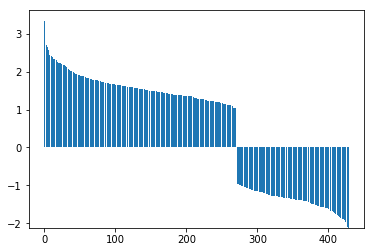

In [21]:
plt.bar(left=x,height=deg_sort.log2FoldChange)

<Container object of 429 artists>

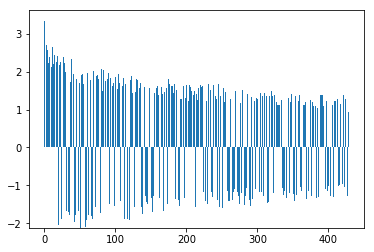

In [22]:
plt.bar(left=x,height=deg_all.log2FoldChange)

,SYMBOL,log2FoldChange
0,ADTRP,3.343302
1,LOC284577,3.025162
2,CDNF,2.877024
3,EXTL3-AS1,2.697945
4,MYOM2,2.567367


In [19]:
deg_sort = deg_sort.reset_index(drop=True)

In [20]:
deg_sort.head()

,SYMBOL,log2FoldChange
0,ADTRP,3.343302
1,LOC284577,3.025162
2,CDNF,2.877024
3,EXTL3-AS1,2.697945
4,LOC100507283,2.637397
